# 1. Face recognition using manual features

<img src="https://raw.githubusercontent.com/cmusatyalab/openface/master/images/summary.jpg" width="500"/>

# Face Normalization -> Detect, Transform, Crop

In [13]:
# https://opencv.org/
import cv2
import pandas as pd
import glob

In [14]:
path = "faces-datamad0820/todas_homogeneas"
homogeneas = [
    *glob.glob(f"{path}/**/*.jpg"),
    *glob.glob(f"{path}/**/*.JPG")
]

In [15]:
homogeneas

['faces-datamad0820/todas_homogeneas/Ana/8.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/9.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/4.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/5.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/7.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/6.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/2.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/3.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/1.jpg',
 'faces-datamad0820/todas_homogeneas/Ana/0.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/8.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/9.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/4.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/5.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/7.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/6.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/2.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/3.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/1.jpg',
 'faces-datamad0820/todas_homogeneas/Dani/0.jpg',
 'faces-da

In [16]:
df = pd.DataFrame({
    "path":homogeneas
})
df.head()

,path
0,faces-datamad0820/todas_homogeneas/Ana/8.jpg
1,faces-datamad0820/todas_homogeneas/Ana/9.jpg
2,faces-datamad0820/todas_homogeneas/Ana/4.jpg
3,faces-datamad0820/todas_homogeneas/Ana/5.jpg
4,faces-datamad0820/todas_homogeneas/Ana/7.jpg


In [17]:
df["GT"] = df.path.apply(lambda x: x.split("/")[2])
df.head()

,path,GT
0,faces-datamad0820/todas_homogeneas/Ana/8.jpg,Ana
1,faces-datamad0820/todas_homogeneas/Ana/9.jpg,Ana
2,faces-datamad0820/todas_homogeneas/Ana/4.jpg,Ana
3,faces-datamad0820/todas_homogeneas/Ana/5.jpg,Ana
4,faces-datamad0820/todas_homogeneas/Ana/7.jpg,Ana


In [18]:
df.GT.value_counts()

Irene          10
Ana            10
Carlos         10
Paula          10
Vanesuki       10
Raul           10
Silvia         10
Laura          10
Javi           10
Joyce          10
Kevin          10
Juan           10
Dani           10
Diego_Lopez    10
Ras            10
Name: GT, dtype: int64

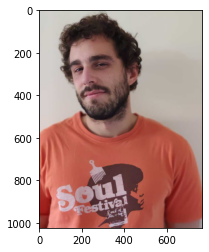

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.imread("faces-datamad0820/todas_homogeneas/dani/0.jpg") 
# Reorganize numpy array for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [25]:
# https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

# Face classifier model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



(1024, 768)


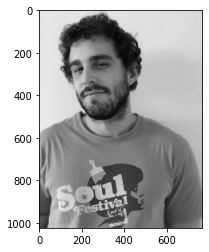

In [28]:

img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img_bw.shape)
plt.imshow(img_bw, cmap="gray")

[[ 70 126 350 350]]


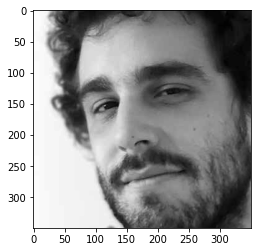

In [29]:
faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
print(faces)
x,y,w,h = faces[0]
plt.imshow(img_bw[y:y+h,x:x+w],cmap="gray")

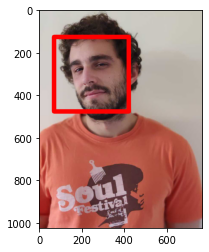

In [34]:
im_col = cv2.rectangle(img, (x,y), (x+w,y+h),(255, 0, 0) ,1)
plt.imshow(im_col)
  

In [36]:
def getFace(img):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)

    # Ensure there is at least 1 face
    if len(faces) > 0:
        x,y,w,h = faces[0]
        return img_bw[y:y+h,x:x+w]
    else:
        raise ValueError("No face found")

        
        
def openImageAndDetectFaces(path):
    img = cv2.imread(path) 
    try:
        print(f"Detecting faces in {path}")
        face_patch = getFace(img)
        return face_patch
    except ValueError as e:
        print(f"Not found image in {path}")
        return None

    

In [37]:
df["face"] = df.path.apply(lambda path: openImageAndDetectFaces(path))

Detecting faces in faces-datamad0820/todas_homogeneas/Ana/8.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/9.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/4.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/5.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/7.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/6.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/2.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/3.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/1.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Ana/0.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Dani/8.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Dani/9.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Dani/4.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Dani/5.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Dani/7.jpg
Detecting faces in faces-datamad082

Not found image in faces-datamad0820/todas_homogeneas/Paula/2.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Paula/3.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Paula/1.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Paula/0.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/8.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/9.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/4.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/5.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/7.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/6.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/2.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/3.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/1.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Kevin/0.jpg
Detecting faces in faces-datamad0820/todas_homogeneas/Joyce/8.jpg
Detecting 

In [38]:
df.head()

,path,GT,face
0,faces-datamad0820/todas_homogeneas/Ana/8.jpg,Ana,"[[212, 211, 208, 210, 212, 207, 208, 210, 211,..."
1,faces-datamad0820/todas_homogeneas/Ana/9.jpg,Ana,"[[205, 208, 212, 213, 211, 208, 207, 207, 207,..."
2,faces-datamad0820/todas_homogeneas/Ana/4.jpg,Ana,"[[208, 207, 205, 206, 207, 207, 206, 205, 207,..."
3,faces-datamad0820/todas_homogeneas/Ana/5.jpg,Ana,"[[208, 208, 205, 207, 205, 205, 206, 205, 210,..."
4,faces-datamad0820/todas_homogeneas/Ana/7.jpg,Ana,"[[209, 210, 210, 210, 209, 207, 207, 209, 211,..."


In [39]:
df = df[~df["face"].isna()]
df["shapes"] = df.face.apply(lambda face: face.shape)

In [41]:
df["GT"].value_counts()

Irene          10
Ana            10
Carlos         10
Silvia         10
Joyce          10
Kevin          10
Juan           10
Dani           10
Diego_Lopez    10
Paula           9
Vanesuki        9
Raul            9
Laura           9
Javi            9
Ras             5
Name: GT, dtype: int64

In [42]:
df.head()

,path,GT,face,shapes
0,faces-datamad0820/todas_homogeneas/Ana/8.jpg,Ana,"[[212, 211, 208, 210, 212, 207, 208, 210, 211,...","(468, 468)"
1,faces-datamad0820/todas_homogeneas/Ana/9.jpg,Ana,"[[205, 208, 212, 213, 211, 208, 207, 207, 207,...","(466, 466)"
2,faces-datamad0820/todas_homogeneas/Ana/4.jpg,Ana,"[[208, 207, 205, 206, 207, 207, 206, 205, 207,...","(440, 440)"
3,faces-datamad0820/todas_homogeneas/Ana/5.jpg,Ana,"[[208, 208, 205, 207, 205, 205, 206, 205, 210,...","(432, 432)"
4,faces-datamad0820/todas_homogeneas/Ana/7.jpg,Ana,"[[209, 210, 210, 210, 209, 207, 207, 209, 211,...","(499, 499)"


[[17.085677   15.05071842 14.19812978 ...  8.07023572  8.21140517
   8.35206311]
 [13.58493684 13.66923575 14.33634433 ...  8.90140375  8.835255
   8.76066134]
 [14.74501162 10.78519463 12.11333946 ...  7.83229706  7.91898288
   8.15322812]
 ...
 [ 9.58680681  8.61581905  8.02230902 ...  5.54671721  5.27697123
   5.79147806]
 [ 9.62428742  8.71518734  8.5439417  ...  6.43290361  5.10678656
   6.58361733]
 [ 9.53169405  8.65265811  8.55418906 ...  5.25055752  5.14723448
   6.18056797]]
(3600,)


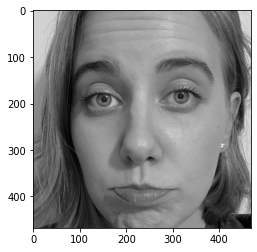

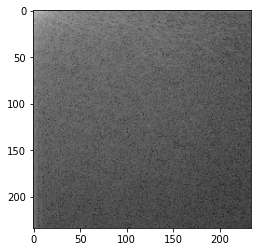

In [46]:
import numpy as np

face = df.face.iloc[0]
plt.figure()
plt.imshow(face, cmap="gray")

fft2d = np.log(np.abs(np.fft.fft2(face)))
fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]

print(fft2d)
plt.figure()

plt.imshow(fft2d, cmap="gray")
fvector = fft2d[0:60,0:60]

print(np.hstack(fvector).shape)

In [47]:
from scipy.fftpack import dct
numfeats = 30
import numpy as np

def getFeats(face):
    try:
        fft = np.log10(np.abs(np.fft.fft2(face)))
        w = fft.shape[0]//2
        fft = fft[3:w+3,3:w+3]
        feats = fft[:numfeats,:numfeats]
        q = np.hstack(feats)
        if len(q) != numfeats*numfeats:
            plt.imshow(face)
            print("Invalid face to get features")
            return None
        return q
    except:
        print("Cannot extract features")
        return None
        

In [48]:
getFeats(face).shape

(900,)

Invalid face to get features
Invalid face to get features
Invalid face to get features


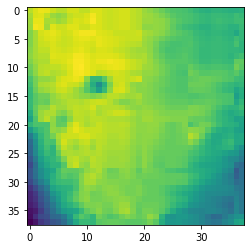

In [49]:
df["feats"] = df["face"].apply(lambda face: getFeats(face))

In [50]:
# Filter out null faces that cannot extract features
df = df[~df["feats"].isnull()]


In [51]:
df.head()

,path,GT,face,shapes,feats
0,faces-datamad0820/todas_homogeneas/Ana/8.jpg,Ana,"[[212, 211, 208, 210, 212, 207, 208, 210, 211,...","(468, 468)","[5.495759680336361, 5.671093818148335, 5.20030..."
1,faces-datamad0820/todas_homogeneas/Ana/9.jpg,Ana,"[[205, 208, 212, 213, 211, 208, 207, 207, 207,...","(466, 466)","[5.301019806293962, 5.672074624517421, 5.31797..."
2,faces-datamad0820/todas_homogeneas/Ana/4.jpg,Ana,"[[208, 207, 205, 206, 207, 207, 206, 205, 207,...","(440, 440)","[5.380476589971203, 5.529082707325254, 5.40163..."
3,faces-datamad0820/todas_homogeneas/Ana/5.jpg,Ana,"[[208, 208, 205, 207, 205, 205, 206, 205, 210,...","(432, 432)","[5.337013272971697, 5.576105330875851, 5.39301..."
4,faces-datamad0820/todas_homogeneas/Ana/7.jpg,Ana,"[[209, 210, 210, 210, 209, 207, 207, 209, 211,...","(499, 499)","[5.608019332027148, 5.74991133883851, 5.412072..."


In [52]:
df.GT.value_counts()

Irene          10
Carlos         10
Silvia         10
Joyce          10
Kevin          10
Juan           10
Dani           10
Diego_Lopez    10
Ana             9
Raul            9
Laura           9
Javi            9
Paula           8
Vanesuki        8
Ras             5
Name: GT, dtype: int64

In [53]:
df.iloc[0]["feats"].shape

(900,)

# Training a RandomForest model

In [61]:
X = df.feats
y = df.GT
print(X.shape,y.shape)

(137,) (137,)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
y_test.shape

(28,)

In [65]:
from scipy.spatial.distance import euclidean as distance

def getPrediction(vect):
    try:
        diffs = X_train.apply(lambda x: distance(x,vect))
        predictIndex = diffs.sort_values(ascending=True).index[0]
        gt = df.iloc[predictIndex].GT
        return gt
    except:
        return "Cannot recognize"

In [66]:

pd.DataFrame({
    "GT":y_test,
    "prediction": X_test.apply(lambda x: getPrediction(x))
})

,GT,prediction
1,Ana,Vanesuki
18,Dani,Diego_Lopez
134,Joyce,Raul
32,Vanesuki,Carlos
30,Vanesuki,Vanesuki
124,Kevin,Joyce
83,Irene,Laura
42,Carlos,Carlos
14,Dani,Irene
61,Javi,Juan


# Now with a proper model

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#neigh = KNeighborsClassifier(n_neighbors=5)
#neigh = SVC(kernel="poly")
neigh = RandomForestClassifier()

XX = np.vstack(X_train)
print(XX)
print(XX.shape)
neigh.fit(XX, y_train)

[[5.59872814 5.55018619 5.49257828 ... 3.90039543 4.03434501 4.1997374 ]
 [5.25112313 5.2067823  5.31657187 ... 3.67111514 3.45118015 3.27368268]
 [5.63599041 5.6504987  5.32310411 ... 4.14533841 3.94354214 3.87456979]
 ...
 [5.52863539 5.48628351 4.99513467 ... 3.73929726 3.8441662  3.32586188]
 [4.24913612 4.20555558 4.22874501 ... 2.67989455 2.38437604 2.6807283 ]
 [5.47325355 5.42868966 4.92133908 ... 3.46849862 4.18855848 4.23015729]]
(109, 900)


RandomForestClassifier()

In [70]:
XXT = np.vstack(X_test)
print(XXT.shape)
y_pred = neigh.predict(XXT)

(28, 900)


In [71]:
pd.DataFrame({
    "GT":y_test,
    "prediction":y_pred
})


,GT,prediction
1,Ana,Kevin
18,Dani,Joyce
134,Joyce,Joyce
32,Vanesuki,Kevin
30,Vanesuki,Vanesuki
124,Kevin,Joyce
83,Irene,Irene
42,Carlos,Carlos
14,Dani,Joyce
61,Javi,Kevin


In [72]:
def whoIsThisGuy(path,faceIndex=0):
    img = cv2.imread(path) 
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
    x,y,w,h = faces[faceIndex]
    lau = img_bw[y:y+h,x:x+w]
    print(neigh.predict([getFeats(lau)]))
    plt.imshow(lau, cmap="gray")

['Juan']


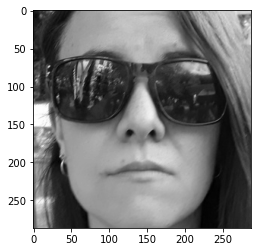

In [74]:
whoIsThisGuy("faces-datamad0820/todas_heterogeneas/Laura/0.jpg",0)

['Irene']


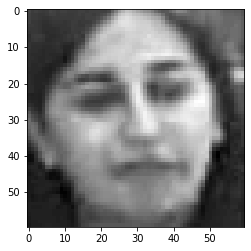

In [75]:
whoIsThisGuy("faces-datamad0820/todas_heterogeneas/Silvia/0.jpg",0)

['Silvia']


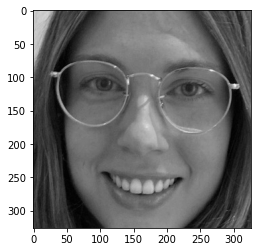

In [76]:
whoIsThisGuy("faces-datamad0820/todas_homogeneas/Silvia/0.jpg",0)

['Irene']


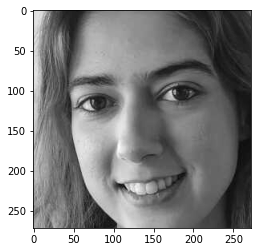

In [77]:
whoIsThisGuy("faces-datamad0820/todas_homogeneas/Irene/0.jpg",0)

['Dani']


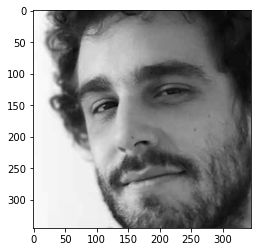

In [78]:
whoIsThisGuy("faces-datamad0820/todas_homogeneas/Dani/0.jpg",0)

['Joyce']


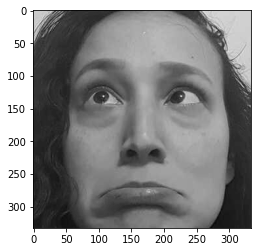

In [79]:
whoIsThisGuy("faces-datamad0820/todas_homogeneas/Joyce/0.jpg",0)